# Where to place the Next Refugee Shelter?

### _A geographical dashboard of the surrounding on neighbourhoud-level_



Welcome to the code of the product for the course Societal Challenge Product of Masterprogram Engineering And Policy Analysis at the Technical University of Delft. The product is a demo that designed by students. 

The product is a tool that helps with the decision-making process of multiple stakeholders (RVB (Problem-Owner), COA and Municipalities) in the placement of refugee shelters placement the Netherlands. The placement of the shelter is a public-polically sensitive task, as the norms and values do not necessarily allign. The CBS data-base is the basis of the dashboard, where objective properties of the neighbourhouds have been selected. This selection and choice of factors give a overview of the suitability of a neighbourhoud on accessibity of infrastructure, healthcare and commerce. Moreover does it say something about the properties and safety and social cohesion of the neighbourhoud. 

We believe that this tool can help in facilitating a constructive and open conversation on the placement of a refugee shelter with bringing little to no bias into the discussion.

#### The libaries

We have used multiple libraries to programm our product. The following libraries were used:

| Libary | Used for|
|--------|---------|
| pysal | For spatial analysis. Helps analyze patterns in geographic data |
|seaborn | For creating advanced and visually appealing graphs.
|contextily | For adding basemaps to spatial data visualizations. Could for example place your neighborhood data on a map that shows roads, rivers, or city layouts|
|splot | To create visualizations of spatial data. Combins analysis and visualization|
|pandas | For handling and analyzing data. It organizes your data in a clean way which makes it easy to manipulate and analyze|
|folium | For creating interactive maps|
|matplotlib | For creating graphs and plots|
|mapclassify | For classifying data into categories or ranges|

In [1]:
#libraries
# !pip install pysal
# !pip install seaborn
# !pip install contextily
# !pip install splot
# !pip install pandas
# !pip install folium matplotlib mapclassify
# !pip install pandoc

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot,  plot_local_autocorrelation
import seaborn as sns
import contextily as cx
import matplotlib.colors as mcolors

2.5
2.5
2.5


C:\Users\jelle\anaconda3\lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


#### Datasets

(We could not find the right tables in the pakkage, but might be availble in the future. In that case the following code might become usefull):

_"pip install cbsodata
import cbsodata
cbsodata.options.catalog_url ='dataderden.cbs.nl'
tables =cbsodata.get_table_list()
data = pd.DataFrame(tables)
data[data["Title"].str.contains("Wijken")]")_



The following datasets have been used from the CBS. 

| Dataset (Name) | URL|
|--------|---------|
| Kerncijfers_wijken_en_buurten_2023_14122024_150331.csv | https://www.cbs.nl/nl-nl/maatwerk/2024/11/kerncijfers-wijken-en-buurten-2023|
|Leefbaarometer-scores wijken 2002-2022.csv | https://www.leefbaarometer.nl/page/Opendata#scores |
|wijkenbuurten_2022_v3.gpkg | https://www.pdok.nl/ogc-webservices/-/article/cbs-gebiedsindelingen#8787c7edcc0df04094d894518eedea62|



We load the CBS neighborhood data of 2023. The reason for this is that the dataset of 2024 has too many missing values.


In [2]:
df = pd.read_csv("Kerncijfers_wijken_en_buurten_2023_14122024_150331.csv", delimiter= ";")
df.head(15)

Wijken en buurten       Regioaanduiding/Gemeentenaam (naam)  \
0                  Aa en Hunze  Aa en Hunze                                
1                Wijk 00 Annen  Aa en Hunze                                
2                        Annen  Aa en Hunze                                
3      Verspreide huizen Annen  Aa en Hunze                                
4                 Wijk 01 Eext  Aa en Hunze                                
5                         Eext  Aa en Hunze                                
6       Verspreide huizen Eext  Aa en Hunze                                
7                Wijk 02 Anloo  Aa en Hunze                                
8                        Anloo  Aa en Hunze                                
9      Verspreide huizen Anloo  Aa en Hunze                                
10            Wijk 03 Gasteren  Aa en Hunze                                
11                    Gasteren  Aa en Hunze                                
12  Verspreide huizen Gasteren  Aa en Hunze                                
13             Wijk 04 Anderen  Aa en Hunze                                
14                     Anderen  Aa en Hunze                                

   Regioaanduiding/Soort regio (omschrijving) Regioaanduiding/Codering (code)  \
0                                  Gemeente                        GM1680       
1                                  Wijk                            WK168000     
2                                  Buurt                           BU16800000   
3                                  Buurt                           BU16800009   
4                                  Wijk                            WK168001     
5                                  Buurt                           BU16800100   
6                                  Buurt                           BU16800109   
7                                  Wijk                            WK168002     
8                                  Buurt                           BU16800200   
9                                  Buurt                           BU16800209   
10                                 Wijk                            WK168003     
11                                 Buurt                           BU16800300   
12                                 Buurt                           BU16800309   
13                                 Wijk                            WK168004     
14                                 Buurt                           BU16800400   

    Regioaanduiding/Indelingswijziging gemeente, wijk, buurt (code)  \
0                                                   1                 
1                                                   1                 
2                                                   1                 
3                                                   1                 
4                                                   1                 
5                                                   1                 
6                                                   1                 
7                                                   1                 
8                                                   1                 
9                                                   1                 
10                                                  1                 
11                                                  1                 
12                                                  1                 
13                                                  1                 
14                                                  1                 

    Bevolking/Aantal inwoners (aantal)  \
0                                25724   
1                                 3605   
2                                 3450   
3                                  150   
4                                 1450   
5                                 1270   
6                                  180   
7                         

We strip the values of the columns down below so it removes any leading (spaces at the beginning) and trailling (spaces at the end) whitespace characters from the strings.

In [3]:
df["Wijken en buurten"] = df["Wijken en buurten"].str.strip()
df["Regioaanduiding/Gemeentenaam (naam)"] = df["Regioaanduiding/Gemeentenaam (naam)"].str.strip()
df["Regioaanduiding/Soort regio (omschrijving)"] = df["Regioaanduiding/Soort regio (omschrijving)"].str.strip()
df["Regioaanduiding/Codering (code)"] = df["Regioaanduiding/Codering (code)"].str.strip()

Everything that has 'Wijk' in the column of 'Regioaanduiding/Soort regio (omschrijving) is retrieved. This filters values of the column that are unfindable. 

In [4]:
df_wijk = df[df["Regioaanduiding/Soort regio (omschrijving)"] == "Wijk"]

In [5]:
df_wijk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3352 entries, 1 to 18112
Data columns (total 20 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   Wijken en buurten                                                                        3352 non-null   object
 1   Regioaanduiding/Gemeentenaam (naam)                                                      3352 non-null   object
 2   Regioaanduiding/Soort regio (omschrijving)                                               3352 non-null   object
 3   Regioaanduiding/Codering (code)                                                          3352 non-null   object
 4   Regioaanduiding/Indelingswijziging gemeente, wijk, buurt (code)                          3352 non-null   int64 
 5   Bevolking/Aantal inwoners (aantal)                                  

We want the scale to be neighborhood scale so this is the column 'Regioaanduiding/Codering (code)' that gives everything seperate neighborhood a specific code number

In [6]:
df_wijk["Regioaanduiding/Codering (code)"].unique

<bound method Series.unique of 1        WK168000
4        WK168001
7        WK168002
10       WK168003
13       WK168004
           ...   
18083    WK019340
18090    WK019341
18094    WK019350
18104    WK019351
18112    WK019352
Name: Regioaanduiding/Codering (code), Length: 3352, dtype: object>

We are aggregating only on the neighbourhoud-level.

In [7]:
df_wijk.head()

Wijken en buurten Regioaanduiding/Gemeentenaam (naam)  \
1      Wijk 00 Annen                         Aa en Hunze   
4       Wijk 01 Eext                         Aa en Hunze   
7      Wijk 02 Anloo                         Aa en Hunze   
10  Wijk 03 Gasteren                         Aa en Hunze   
13   Wijk 04 Anderen                         Aa en Hunze   

   Regioaanduiding/Soort regio (omschrijving) Regioaanduiding/Codering (code)  \
1                                        Wijk                        WK168000   
4                                        Wijk                        WK168001   
7                                        Wijk                        WK168002   
10                                       Wijk                        WK168003   
13                                       Wijk                        WK168004   

    Regioaanduiding/Indelingswijziging gemeente, wijk, buurt (code)  \
1                                                   1                 
4                                                   1                 
7                                                   1                 
10                                                  1                 
13                                                  1                 

    Bevolking/Aantal inwoners (aantal)  \
1                                 3605   
4                                 1450   
7                                  395   
10                                 400   
13                                 250   

    Bevolking/Particuliere huishoudens/Huishoudens totaal (aantal)  \
1                                                1585                
4                                                 645                
7                                                 165                
10                                                180                
13                                                105                

   Bevolking/Bevolkingsdichtheid (aantal inwoners per km²)  \
1                                                 246        
4                                                  81        
7                                                  48        
10                                                 44        
13                                                 23        

    Wonen/Woningvoorraad (aantal)  \
1                            1647   
4                             598   
7                             169   
10                            180   
13                            112   

   Wonen/Gemiddelde WOZ-waarde van woningen (x 1 000 euro)  \
1                                                 342        
4                                                 362        
7                                                 419        
10                                                460        
13                                                455        

   Arbeid/Nettoarbeidsparticipatie (%)  \
1                                    .   
4                                    .   
7                                    .   
10                                   .   
13                                   .   

   Inkomen/Inkomen van personen/Gemiddeld inkomen per inwoner  (x 1 000 euro)  \
1                                                   .                           
4                                                   .                           
7                                                   .                           
10                                                  .                           
13                                                  .                           

   Inkomen/Inkomen van huishoudens/Gem. gestandaardiseerd inkomen van huish (x 1 000 euro)  \
1                                                   .                                        
4                                                   .                                        
7                                                   .          

From our client the RVB, we received a list of locations we can use for use cases to look at examples for our product. This list is the following:


Regulusweg, Den Haag
Luttenbergerweg, Amsterdam
Neuhuyskade, Den Haag
Brinkstraat, Assen
Strijbeekseweg, Srijbeek
Huiserf, Breda
Rijksweg, Rijen
De Omloop, Zefvenbergschen Hoek
Zwarteweg, Den Haag
Waalresweg, Valkenswaard
Slinge, Rotterdam
Taborstraat, Rotterdam
Rokkeveenseweg, Zoetermeer
PI overmaze, Maastricht
Caissonweg, Almere
PI overmaze, Overloon/ Land van Cuijk

We received the addresses from the RVB. With the zip code we identified the neighborhood names and the ones in the dataset. These neighborhood names are shown down below with the corresponding code number and municipality

In [8]:
# Define the list of Wijken names in the desired sequence
wijken_list = [
    "Wijk 39 Binckhorst",
    "Amstel III/Bullewijk",
    "Wijk 04 Benoordenhout",
    "Assen-Oost",
    "Galder",
    "Breda noord-west",
    "Rijen",
    "Wijk 01 Zevenbergschen Hoek",
    "Wijk 11 Duinoord",
    "Wijk 00 Valkenswaard",
    "Charlois",
    "Kralingen-Crooswijk",
    "Industriegebied",
    "Wijk 04 Buitenwijk Oost",
    "Centrum Almere Buiten",
    "Cuijk"
]

# Filter the DataFrame to include only rows with the Wijken in the list
filtered_df = df_wijk[df_wijk["Wijken en buurten"].isin(wijken_list)]

# Ensure the order of rows matches the order of the Wijken in the list
filtered_df = filtered_df.set_index("Wijken en buurten").loc[wijken_list]

# Reset index to make it cleaner
result = filtered_df.reset_index()

# Select relevant columns
result = result[["Wijken en buurten", "Regioaanduiding/Codering (code)", "Regioaanduiding/Gemeentenaam (naam)"]]


print(result)


              Wijken en buurten Regioaanduiding/Codering (code)  \
0            Wijk 39 Binckhorst                        WK051839   
1          Amstel III/Bullewijk                        WK0363TA   
2         Wijk 04 Benoordenhout                        WK051804   
3                    Assen-Oost                        WK010603   
4                        Galder                        WK172304   
5              Breda noord-west                        WK075806   
6                         Rijen                        WK078401   
7   Wijk 01 Zevenbergschen Hoek                        WK170901   
8              Wijk 11 Duinoord                        WK051811   
9          Wijk 00 Valkenswaard                        WK085800   
10                     Charlois                        WK059915   
11          Kralingen-Crooswijk                        WK059908   
12              Industriegebied                        WK063708   
13      Wijk 04 Buitenwijk Oost                        WK09350

Now we load the dataset of the 'leefbarometer'. Note that this set is from 2022 and is a limitation of our analysis. The reason for this is that the 'leefbarometer' is only measured once every two years. 

In [9]:
df_baro = pd.read_csv("Leefbaarometer-scores wijken 2002-2022.csv")

In [10]:
df_baro_2022 = df_baro[df_baro["jaar"] == 2022]
df_baro_2022.head(10)

wk_code         wk_naam  jaar       lbm       afw       fys       onv  \
7   WK001400         Centrum  2022  4.287417  0.185152  0.028872 -0.087251   
15  WK001401        Oud-Zuid  2022  4.226064  0.123799  0.009034  0.000244   
23  WK001402        Oud-West  2022  4.223437  0.121173  0.021581 -0.014384   
31  WK001403       Oud-Noord  2022  4.065529 -0.036736  0.014002 -0.079554   
39  WK001404  Oosterparkwijk  2022  4.130214  0.027949  0.024799 -0.060975   
47  WK001405        Zuidoost  2022  4.279056  0.176791  0.012300  0.055035   
55  WK001406    Helpman e.o.  2022  4.199229  0.096965  0.029206  0.002709   
63  WK001407        Zuidwest  2022  4.243866  0.141601  0.035509  0.034521   
71  WK001408   Hoogkerk e.o.  2022  4.204728  0.102463  0.019067  0.052652   
79  WK001409      Nieuw-West  2022  4.022726 -0.079539  0.029231 -0.040452   

         soc       vrz       won  
7  -0.042043  0.280827  0.004748  
15 -0.040961  0.171843 -0.016361  
23 -0.049363  0.151338  0.012001  
31 -0.064545  0.121672 -0.028311  
39 -0.041514  0.134475 -0.028837  
47 -0.014763  0.118390  0.005829  
55 -0.020155  0.095883 -0.010678  
63 -0.019346  0.095516 -0.004599  
71  0.030687 -0.024698  0.024755  
79 -0.033053  0.019477 -0.054742

We now merge the two datasets based on their neighborhood.


In [11]:
df_combined = df_wijk.merge(df_baro_2022, left_on="Regioaanduiding/Codering (code)", right_on="wk_code", how = "right")
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3308 entries, 0 to 3307
Data columns (total 30 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Wijken en buurten                                                                        3182 non-null   object 
 1   Regioaanduiding/Gemeentenaam (naam)                                                      3182 non-null   object 
 2   Regioaanduiding/Soort regio (omschrijving)                                               3182 non-null   object 
 3   Regioaanduiding/Codering (code)                                                          3182 non-null   object 
 4   Regioaanduiding/Indelingswijziging gemeente, wijk, buurt (code)                          3182 non-null   float64
 5   Bevolking/Aantal inwoners (aantal)                            

Now we add a SHP file to give the values and neighborhood code also a spatial value

In [12]:
#CSV and add SHP file (geographical data)
gdf= gpd.read_file("wijkenbuurten_2022_v3.gpkg")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14412 entries, 0 to 14411
Columns: 210 entries, buurtcode to geometry
dtypes: float64(99), geometry(1), int64(102), object(8)
memory usage: 23.1+ MB


We filter the dataset so only values that include 'WK' in the string of 'wijkcode' are included in the dataset

In [13]:
gdf = gdf[gdf["wijkcode"].str.contains("WK")]   

We add the geodata to eventually have the final dataset. This dataset still can be filtered but has the aspects we want in our dataset.

In [14]:
Df_final = pd.merge(gdf, df_combined, how='left', left_on="wijkcode",
                right_on="Regioaanduiding/Codering (code)")


In [15]:
Df_final.isna().sum()

buurtcode         0
buurtnaam         0
wijkcode          0
gemeentecode      0
gemeentenaam      0
               ... 
fys             717
onv             717
soc             717
vrz             717
won             717
Length: 240, dtype: int64

In [16]:
#Df_final.head(5)

Here we are able to download this dataset as 'output.xlsx'

In [17]:
print(Df_final.columns)
Df_final.head(1).to_excel('output.xlsx', header=True, index=False, na_rep='null')

Index(['buurtcode', 'buurtnaam', 'wijkcode', 'gemeentecode', 'gemeentenaam',
       'indelingswijziging_wijken_en_buurten', 'water',
       'meest_voorkomende_postcode', 'dekkingspercentage',
       'omgevingsadressendichtheid',
       ...
       'wk_code', 'wk_naam', 'jaar_y', 'lbm', 'afw', 'fys', 'onv', 'soc',
       'vrz', 'won'],
      dtype='object', length=240)


Now what is important is that not every variable from the huge dataset is needed. In our product we choose 10 variables. The variables are

'aantal_huishoudens',

'aantal_bedrijfsvestigingen', 

'ziekenhuis_excl_buitenpolikliniek_gem_afst_in_km',

'oprit_hoofdverkeersweg_gemiddelde_afstand_in_km',

'grote_supermarkt_gemiddelde_afstand_in_km',

'basisonderwijs_gemiddelde_afstand_in_km',

'voortgezet_onderwijs_gem_afstand_in_km',

'treinstation_gemiddelde_afstand_in_km',

'soc',

'onv'

The explanation of the first 8 variables can be found at the CBS website.
The explanation of 'soc' and 'onv' can be found here: https://leefbaarometer.nl/page/dimensies 

In [18]:
Df_Final_filtered = Df_final.loc[:, Df_final.columns.isin([
    "buurtnaam",
    "buurtcode",
    'wijkcode',
    'geometry',
    'aantal_huishoudens',
    'aantal_bedrijfsvestigingen',
    'ziekenhuis_excl_buitenpolikliniek_gem_afst_in_km',
    'oprit_hoofdverkeersweg_gemiddelde_afstand_in_km',
    'grote_supermarkt_gemiddelde_afstand_in_km',
    'basisonderwijs_gemiddelde_afstand_in_km',
    'voortgezet_onderwijs_gem_afstand_in_km',
    'treinstation_gemiddelde_afstand_in_km',
    'soc',
    'onv'  
])]

Here this code extracts the names of all columns in the dataframe starting from the 66th column except for the geometry columns. This gives all the variables we want as column names.

In [19]:
Column_names_1 = [column for column in Df_Final_filtered.iloc[:,3:]]
Column_names = [column for column in Column_names_1 if column != "geometry"]
print(Column_names)

['aantal_huishoudens', 'aantal_bedrijfsvestigingen', 'ziekenhuis_excl_buitenpolikliniek_gem_afst_in_km', 'grote_supermarkt_gemiddelde_afstand_in_km', 'basisonderwijs_gemiddelde_afstand_in_km', 'voortgezet_onderwijs_gem_afstand_in_km', 'oprit_hoofdverkeersweg_gemiddelde_afstand_in_km', 'treinstation_gemiddelde_afstand_in_km', 'onv', 'soc']


In [20]:
Df_Final_filtered = Df_Final_filtered.copy()

In [21]:
Df_Final_filtered.describe()

aantal_huishoudens  aantal_bedrijfsvestigingen  \
count        1.441200e+04                1.441200e+04   
mean        -6.586083e+05               -6.590152e+05   
std          8.092470e+06                8.092437e+06   
min         -1.000000e+08               -1.000000e+08   
25%          7.000000e+01                4.000000e+01   
50%          3.000000e+02                9.500000e+01   
75%          7.700000e+02                1.950000e+02   
max          1.396000e+04                5.475000e+03   

       ziekenhuis_excl_buitenpolikliniek_gem_afst_in_km  \
count                                      1.441200e+04   
mean                                      -5.953363e+06   
std                                        2.366291e+07   
min                                       -1.000000e+08   
25%                                        3.300000e+00   
50%                                        7.500000e+00   
75%                                        1.270000e+01   
max                                        7.220000e+01   

       grote_supermarkt_gemiddelde_afstand_in_km  \
count                               1.441200e+04   
mean                               -5.953371e+06   
std                                 2.366291e+07   
min                                -1.000000e+08   
25%                                 5.000000e-01   
50%                                 1.000000e+00   
75%                                 2.100000e+00   
max                                 1.440000e+01   

       basisonderwijs_gemiddelde_afstand_in_km  \
count                             1.441200e+04   
mean                             -5.953371e+06   
std                               2.366291e+07   
min                              -1.000000e+08   
25%                               5.000000e-01   
50%                               8.000000e-01   
75%                               1.600000e+00   
max                               1.360000e+01   

       voortgezet_onderwijs_gem_afstand_in_km  \
count                            1.441200e+04   
mean                            -5.953369e+06   
std                              2.366291e+07   
min                             -1.000000e+08   
25%                              1.100000e+00   
50%                              2.300000e+00   
75%                              5.000000e+00   
max                              2.290000e+01   

       oprit_hoofdverkeersweg_gemiddelde_afstand_in_km  \
count                                     1.441200e+04   
mean                                     -5.953370e+06   
std                                       2.366291e+07   
min                                      -1.000000e+08   
25%                                       9.000000e-01   
50%                                       1.500000e+00   
75%                                       2.400000e+00   
max                                       4.640000e+01   

       treinstation_gemiddelde_afstand_in_km           onv           soc  
count                           1.441200e+04  13695.000000  13695.000000  
mean                           -5.953366e+06      0.040756      0.028442  
std                             2.366291e+07      0.065776      0.045572  
min                            -1.000000e+08     -0.368812     -0.155857  
25%                             1.900000e+00      0.011265     -0.001922  
50%                             4.000000e+00      0.057511      0.028977  
75%                             8.100000e+00      0.087203      0.059348  
max                             5.970000e+01      0.155909      0.391775

We note that some values are (well below 0). We clean them and this results in values below zero are also excluded

In [22]:
columns_to_clean = [
    "aantal_huishoudens",
    "aantal_bedrijfsvestigingen",
    "grote_supermarkt_gemiddelde_afstand_in_km",
    "basisonderwijs_gemiddelde_afstand_in_km",
    "ziekenhuis_excl_buitenpolikliniek_gem_afst_in_km",
    "oprit_hoofdverkeersweg_gemiddelde_afstand_in_km",
    "voortgezet_onderwijs_gem_afstand_in_km",
    "treinstation_gemiddelde_afstand_in_km",
    "onv",
    "soc"
]

In [23]:
# Replace invalid values with NaN
for col in columns_to_clean:
    Df_Final_filtered[col] = Df_Final_filtered[col].where(Df_Final_filtered[col] >-1000, other=-1000)
    Df_Final_filtered = Df_Final_filtered[Df_Final_filtered[col] != -1000].to_crs(epsg=3857)
Df_Final_filtered.describe()


aantal_huishoudens  aantal_bedrijfsvestigingen  \
count        13001.000000                13001.000000   
mean           584.147758                  157.457503   
std            787.466454                  201.345184   
min              0.000000                    0.000000   
25%             90.000000                   45.000000   
50%            325.000000                  100.000000   
75%            780.000000                  190.000000   
max          13960.000000                 5475.000000   

       ziekenhuis_excl_buitenpolikliniek_gem_afst_in_km  \
count                                      13001.000000   
mean                                           9.388732   
std                                            6.688542   
min                                            0.300000   
25%                                            4.100000   
50%                                            8.200000   
75%                                           13.100000   
max                                           72.200000   

       grote_supermarkt_gemiddelde_afstand_in_km  \
count                               13001.000000   
mean                                    1.610922   
std                                     1.370067   
min                                     0.000000   
25%                                     0.600000   
50%                                     1.100000   
75%                                     2.200000   
max                                    14.400000   

       basisonderwijs_gemiddelde_afstand_in_km  \
count                             13001.000000   
mean                                  1.206169   
std                                   0.959364   
min                                   0.100000   
25%                                   0.500000   
50%                                   0.900000   
75%                                   1.600000   
max                                  13.600000   

       voortgezet_onderwijs_gem_afstand_in_km  \
count                            13001.000000   
mean                                 3.649850   
std                                  2.968174   
min                                  0.000000   
25%                                  1.300000   
50%                                  2.700000   
75%                                  5.400000   
max                                 22.900000   

       oprit_hoofdverkeersweg_gemiddelde_afstand_in_km  \
count                                     13001.000000   
mean                                          1.898600   
std                                           1.825851   
min                                           0.000000   
25%                                           1.000000   
50%                                           1.600000   
75%                                           2.400000   
max                                          46.400000   

       treinstation_gemiddelde_afstand_in_km           onv           soc  
count                           13001.000000  13001.000000  13001.000000  
mean                                6.579994      0.041155      0.028065  
std                                 6.793926      0.065209      0.045287  
min                                 0.100000     -0.344945     -0.155857  
25%                                 2.200000      0.011749     -0.002423  
50%                                 4.400000      0.057907      0.028977  
75%                                 8.600000      0.087251      0.058523  
max                                59.700000      0.155909      0.391775

In [24]:
import folium
List_of_RefugeeShelters = ['BU05183960','BU05180479','BU01060000','BU17230402','BU17230402'
                           ,'BU07580601','BU07840109','BU17090109','BU05181142','BU08580000',
                           'BU05991574','BU05990841','BU06370800','BU09350404','BU00344102','BU19820811']
Df_Final_filtered["RefugeeShelter"] = np.where(Df_Final_filtered["buurtcode"].isin(List_of_RefugeeShelters),1,0)


In [25]:
Df_HasRefugeeshelter =Df_Final_filtered[Df_Final_filtered["RefugeeShelter"] ==1]
Df_HasRefugeeshelter.to_excel('RefugeeShelters.xlsx', header=True, index=False, na_rep='null')
Df_HasRefugeeshelter.describe().to_excel('RefugeeSheltersDescriptives.xlsx', header=True, index=False, na_rep='null')


In [26]:
# Rename columns
Df_Final_filtered = Df_Final_filtered.rename(columns={
    'buurtcode':"Neighbourhoud Code",
    "buurtnaam": "Neighbourhoud Name",
    'wijkcode':"District Code (CBS)",
    "aantal_huishoudens":'Number of households',
    "aantal_bedrijfsvestigingen": 'Number of business establishments',
    "grote_supermarkt_gemiddelde_afstand_in_km": 'Accessibility for Large Supermarket (km)',
    "basisonderwijs_gemiddelde_afstand_in_km": 'Accessibility for Primary Education (km)',
    "ziekenhuis_excl_buitenpolikliniek_gem_afst_in_km": 'Accessibility to Hospitals (Excl. Outpatient Clinic) (km)',
    "oprit_hoofdverkeersweg_gemiddelde_afstand_in_km": 'Accessibility to main road (km)',
    "voortgezet_onderwijs_gem_afstand_in_km": 'Accessibility for Secondary Education (km)',
    "treinstation_gemiddelde_afstand_in_km": 'Train Station Accessibility (km)',
    "onv": 'Leefbaroscore Disturbance and lack of safety',
    "soc": "Leefbaroscore Social Cohesion"})


In [27]:
Df_HasRefugeeshelter =Df_Final_filtered[Df_Final_filtered["RefugeeShelter"] ==1]
Df_HasRefugeeshelter.to_excel('RefugeeSheltersFB.xlsx', header=True, index=False, na_rep='null')
Df_Final_filtered.to_excel('LongOutput.xlsx',header=True, index=False, na_rep='null')

## Database
The following section will acces the database based on Neighbourhood name:

In [28]:
filter_database_1 = input('Select a neighbourhoud:')
filtered = Df_Final_filtered.iloc[:,:11].loc[Df_Final_filtered["Neighbourhoud Name"].str.contains(filter_database_1)]
filtered.head(20)

Select a neighbourhoud:Binckhorst


Neighbourhoud Code Neighbourhoud Name District Code (CBS)  \
6569         BU05183960         Binckhorst            WK051839   
8509         BU07960504         Binckhorst            WK079605   

      Number of households  Number of business establishments  \
6569                   615                               1165   
8509                   130                                 40   

      Accessibility to Hospitals (Excl. Outpatient Clinic) (km)  \
6569                                                1.6           
8509                                               11.5           

      Accessibility for Large Supermarket (km)  \
6569                                       1.2   
8509                                       3.0   

      Accessibility for Primary Education (km)  \
6569                                       1.2   
8509                                       2.4   

      Accessibility for Secondary Education (km)  \
6569                                         1.5   
8509                                         3.0   

      Accessibility to main road (km)  Train Station Accessibility (km)  
6569                              1.5                               1.7  
8509                              1.0                               3.5

Or based on having a refugeeshelter:

In [33]:
filter_database_2 = input('Has the Neighbourhood a Refugeeshelter (1= Yes, 0=No)?')
filtered = Df_Final_filtered.loc[Df_Final_filtered["RefugeeShelter"] == 1]
filtered.head(20)

Has the Neighbourhood a Refugeeshelter (1= Yes, 0=No)?1


Neighbourhoud Code                     Neighbourhoud Name  \
394           BU00344102             Centrum Almere Buiten Zuid   
970           BU01060000                          Brinkkwartier   
6486          BU05180479          Van Hoytemastraat en omgeving   
6498          BU05181142                   Stadhoudersplantsoen   
6569          BU05183960                             Binckhorst   
7060          BU05990841                         Kralingen West   
7091          BU05991574                           Oud Charlois   
7416          BU06370800                         Rokkehage c.a.   
8123          BU07580601                            Kievitsloop   
8386          BU07840109                             Rijen Zuid   
9200          BU08580000                                Centrum   
9556          BU09350404                                 Limmel   
11079         BU17090109  Verspreide huizen Zevenbergschen Hoek   
11307         BU17230402                    Buitengebied Galder   
14303         BU19820811                  Cuijk industriegebied   

      District Code (CBS)  Number of households  \
394              WK003441                   500   
970              WK010600                   295   
6486             WK051804                  1075   
6498             WK051811                  1635   
6569             WK051839                   615   
7060             WK059908                  9065   
7091             WK059915                  7225   
7416             WK063708                    70   
8123             WK075806                  1795   
8386             WK078401                   505   
9200             WK085800                  2325   
9556             WK093504                  1175   
11079            WK170901                   145   
11307            WK172304                   125   
14303            WK198208                   115   

       Number of business establishments  \
394                                  125   
970                                  180   
6486                                 405   
6498                                 475   
6569                                1165   
7060                                1925   
7091                                1860   
7416                                 260   
8123                                 425   
8386                                  70   
9200                                 785   
9556                                 130   
11079                                 85   
11307                                 80   
14303                                360   

       Accessibility to Hospitals (Excl. Outpatient Clinic) (km)  \
394                                                  6.1           
970                                                  1.9           
6486                                                 1.6           
6498                                                 2.6           
6569                                                 1.6           
7060                                                 3.6           
7091                                                 2.6           
7416                                                 3.5           
8123                                                 6.5           
8386                                                 9.7           
9200                                                 8.4           
9556                                                 4.6           
11079                                               16.1           
11307                                                9.6           
14303                                               11.1           

       Accessibility for Large Supermarket (km)  \
394                                         0.2   
970                                         0.1   
6486                                        0.4   
6498                                        0.4   
6569                                        1.2   
7060            

## Graphs 
In the following section the graphs are plotted. The different factors have different thresholds as to when the neighborhood has given a green color or when a certain neighborhood has a red color. The argumentation of these thresholds can be seen in assignment 3 / report. 

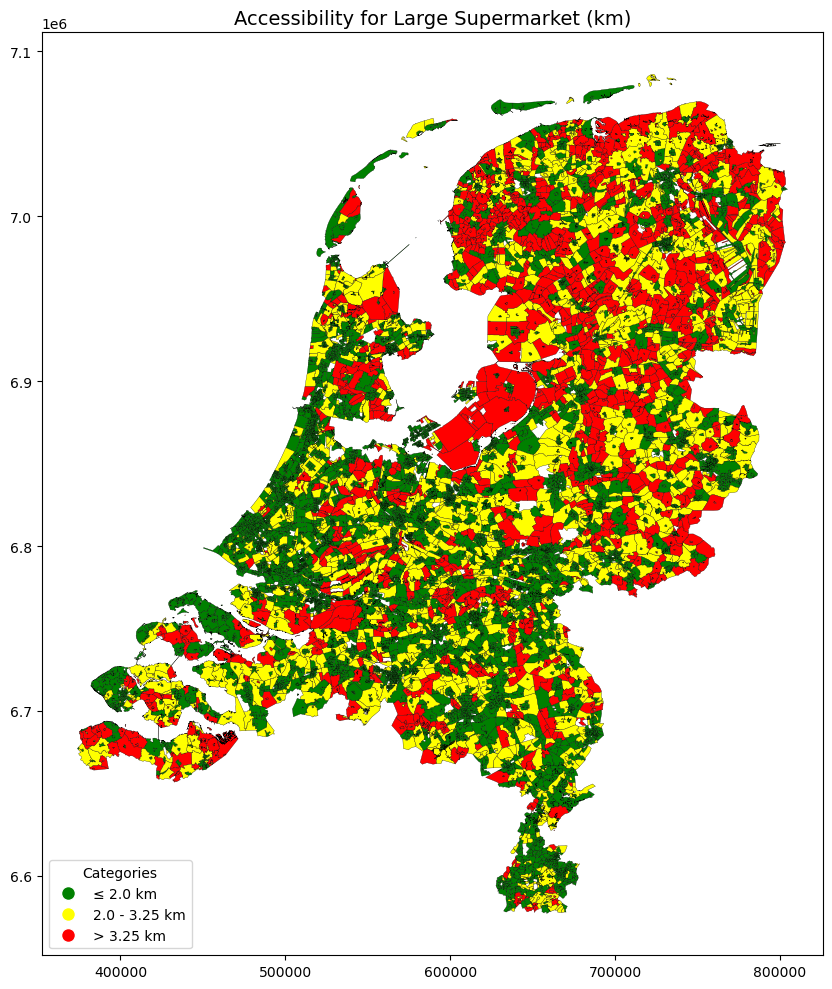

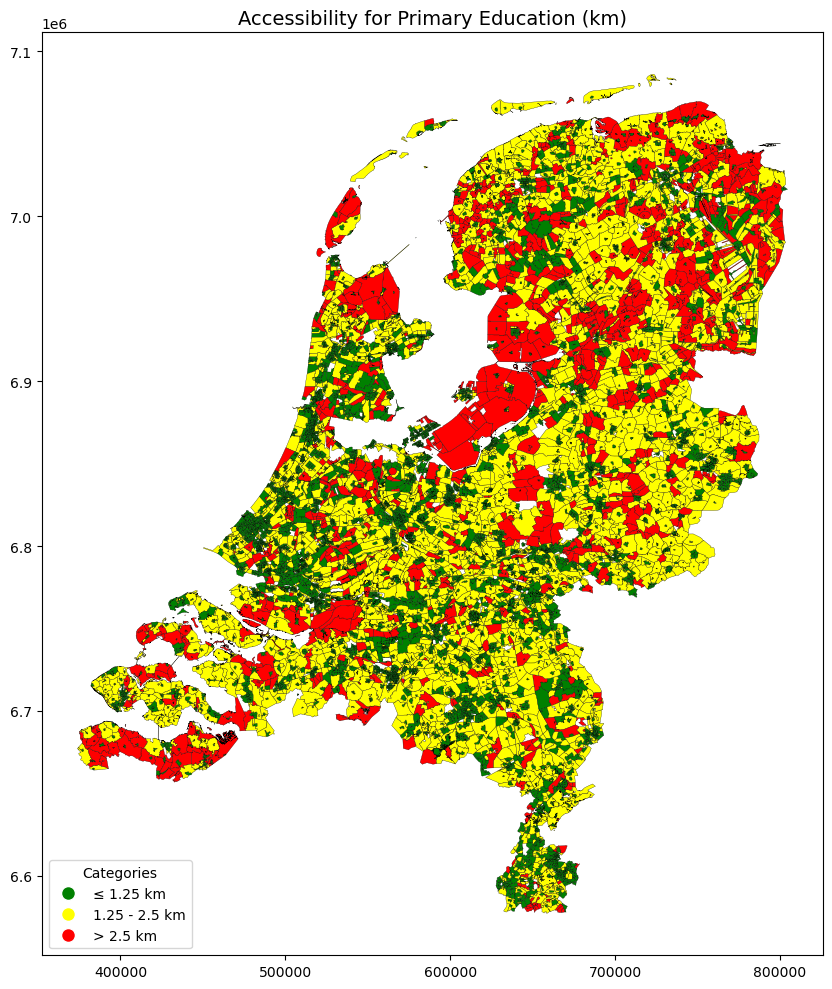

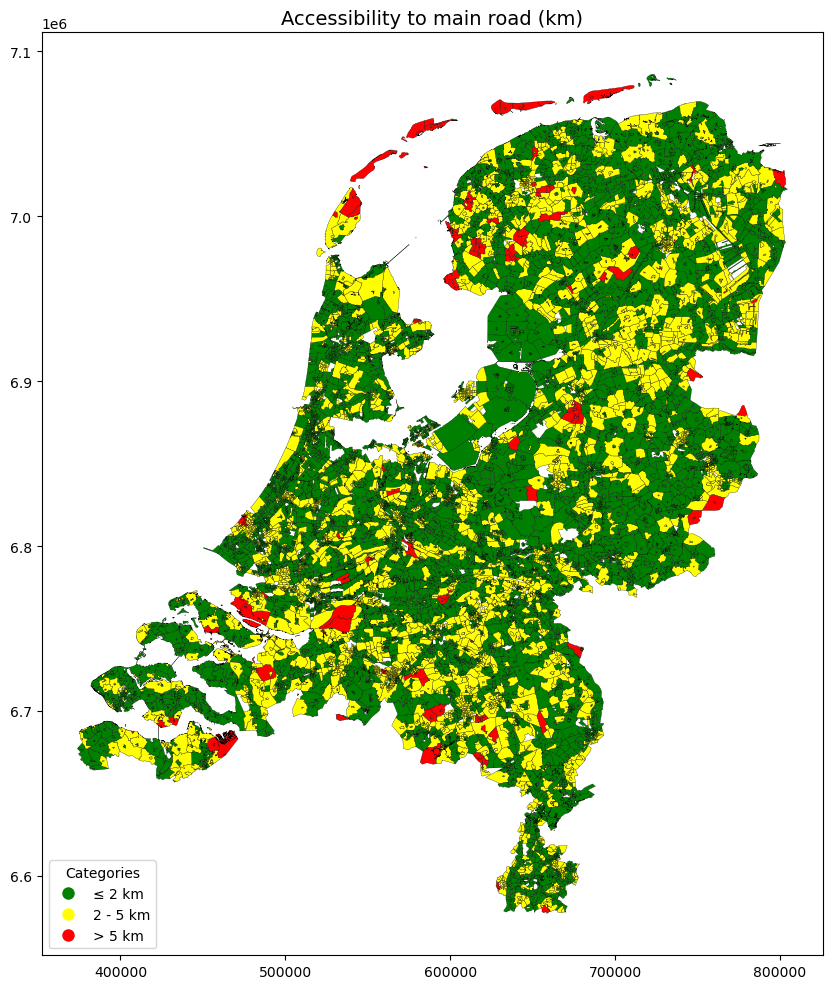

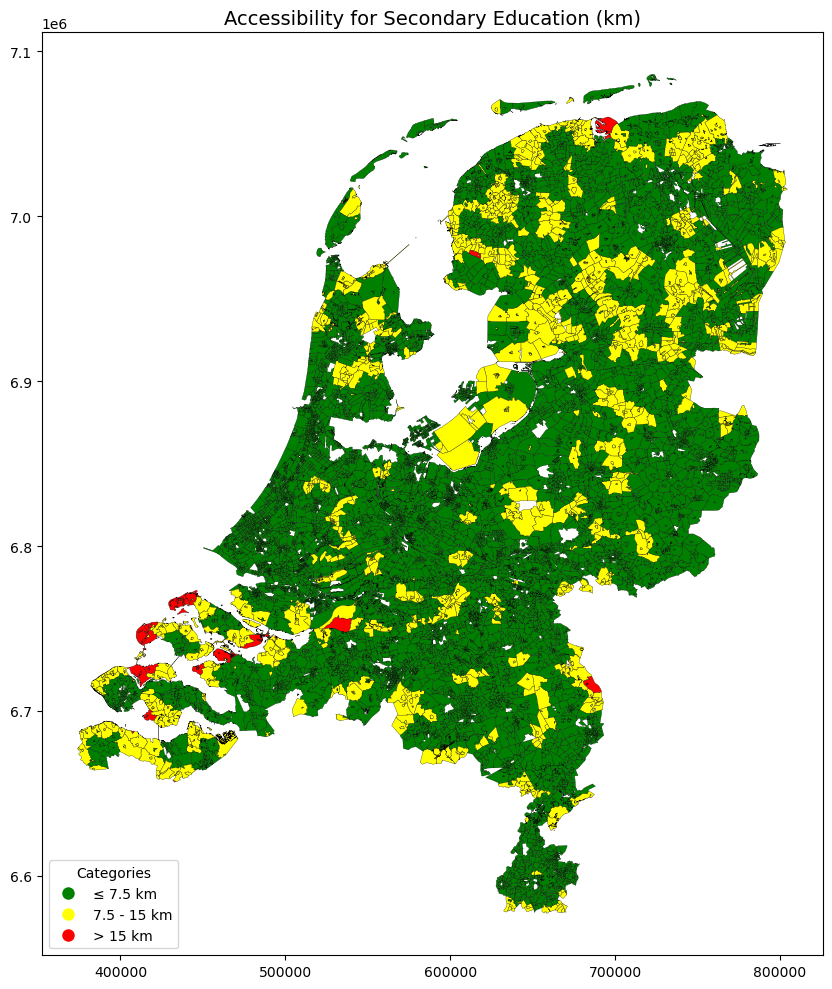

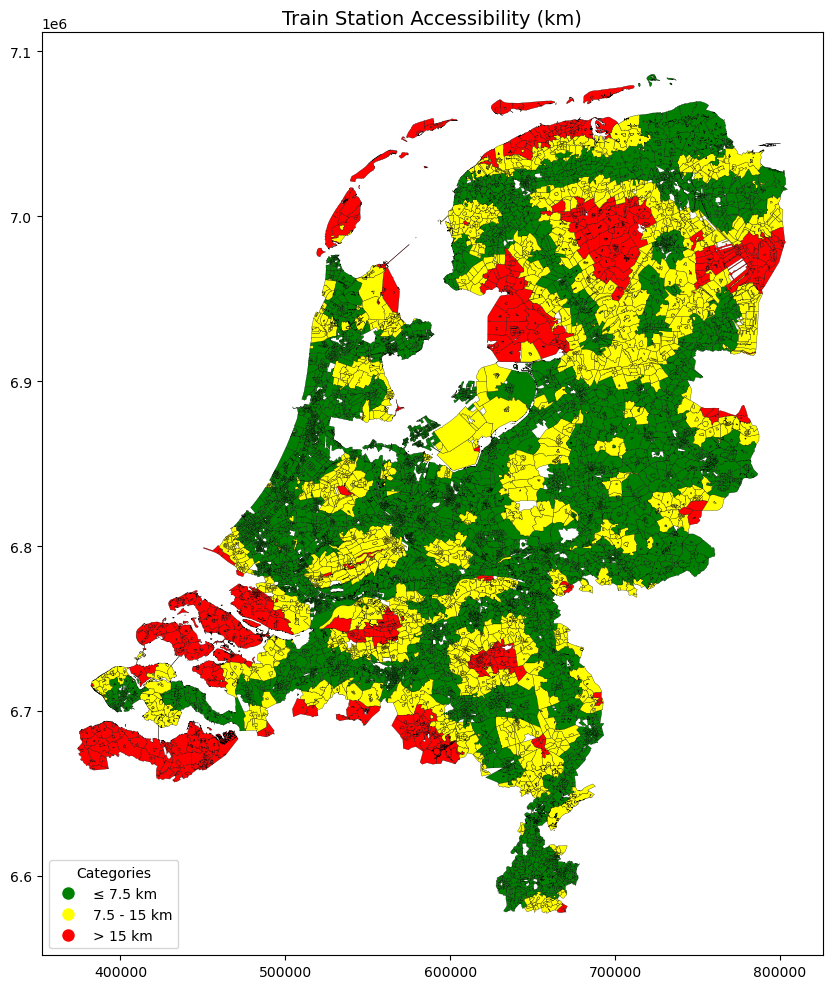

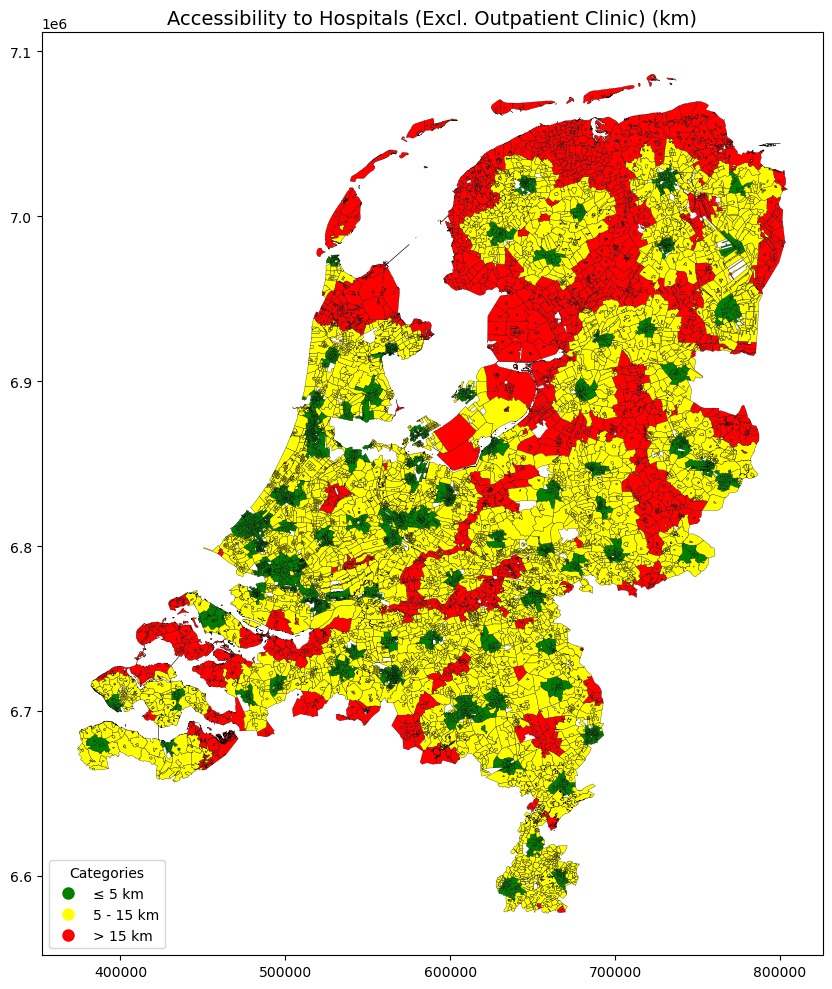

In [34]:
#setting the threshold for different factors

variable_settings = {
    'Accessibility for Large Supermarket (km)':{ 
        'thresholds': { '≤ 2.0 km': 2.0,'2.0 - 3.25 km': 3.25},
        'colors': {'≤ 2.0 km': 'green','2.0 - 3.25 km': 'yellow','> 3.25 km': 'red' },
        'title': 'Accessibility for Large Supermarket (km)'},
    
    'Accessibility for Primary Education (km)':{ 
        'thresholds': {'≤ 1.25 km': 1.25,'1.25 - 2.5 km': 2.5},
        'colors': {'≤ 1.25 km': 'green','1.25 - 2.5 km': 'yellow','> 2.5 km': 'red'},
        'title': 'Accessibility for Primary Education (km)'},
    
      'Accessibility to main road (km)':{ 
        'thresholds': {'≤ 2 km': 2,'2 - 5 km': 5},
        'colors': {'≤ 2 km': 'green','2 - 5 km': 'yellow','> 5 km': 'red'},
        'title': 'Accessibility to main road (km)'},
    
    'Accessibility for Secondary Education (km)':{ 
         'thresholds': {'≤ 7.5 km': 7.5,'7.5 - 15 km': 15.0},
        'colors': { '≤ 7.5 km': 'green','7.5 - 15 km': 'yellow','> 15 km': 'red'},
        'title': 'Accessibility for Secondary Education (km)'},
    
    'Train Station Accessibility (km)' :{ 
        'thresholds': {'≤ 7.5 km':7.5, '7.5 - 15 km': 15},
        'colors': { '≤ 7.5 km': 'green','7.5 - 15 km': 'yellow','> 15 km': 'red'},
        'title': 'Train Station Accessibility (km)'},
    
    'Accessibility to Hospitals (Excl. Outpatient Clinic) (km)' :{ 
        'thresholds': {'≤ 5 km':5, '5 - 15 km': 15},
        'colors': { '≤ 5 km': 'green','5 - 15 km': 'yellow','> 15 km': 'red'},
        'title': 'Accessibility to Hospitals (Excl. Outpatient Clinic) (km)'}}
 

#Classifying values into categories based on thresholds
def classify_value(value, thresholds):
    if np.isnan(value):  
        return 'Missing'
    threshold_values = list(thresholds.values())
    threshold_keys = list(thresholds.keys())
    if value <= threshold_values[0]:
        return threshold_keys[0]  # 
    elif value <= threshold_values[1]:
        return threshold_keys[1]  
    else:
        return f'>{threshold_keys[1].split("-")[-1]}'.strip()  

#Iterate over each variable and generate individual maps
for column, settings in variable_settings.items():
    thresholds = settings['thresholds']
    colors = settings['colors']
    map_title = settings['title']
    
    #Create a new column for the category
    Df_Final_filtered[f'{column}_category'] = Df_Final_filtered[column].apply(classify_value, args=(thresholds,))
  
      
    #Map plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    Df_Final_filtered.plot(
        ax=ax,
        color=Df_Final_filtered[f'{column}_category'].map(colors),
        edgecolor='black',
        linewidth=0.2)
    
    #Add title and legend
    ax.set_title(map_title, fontsize=14)
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=cat, markerfacecolor=color, markersize=10)
        for cat, color in colors.items()]
    ax.legend(handles=legend_elements, loc='lower left', title="Categories")
    plt.tight_layout()
    plt.plot()

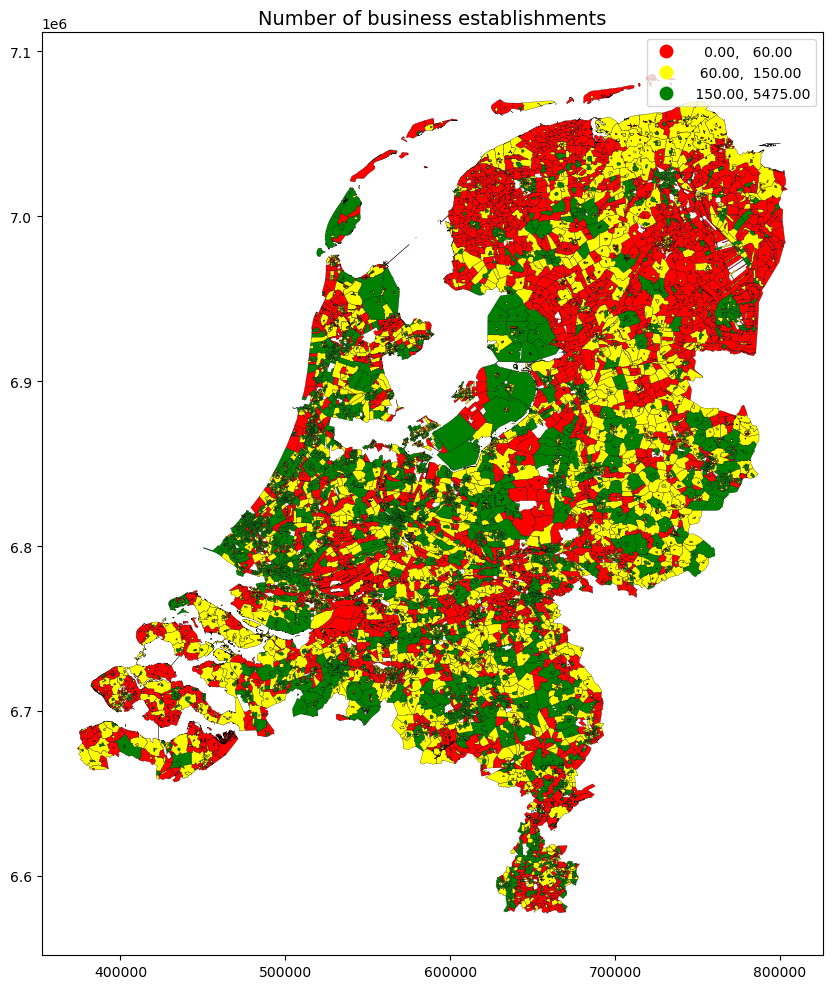

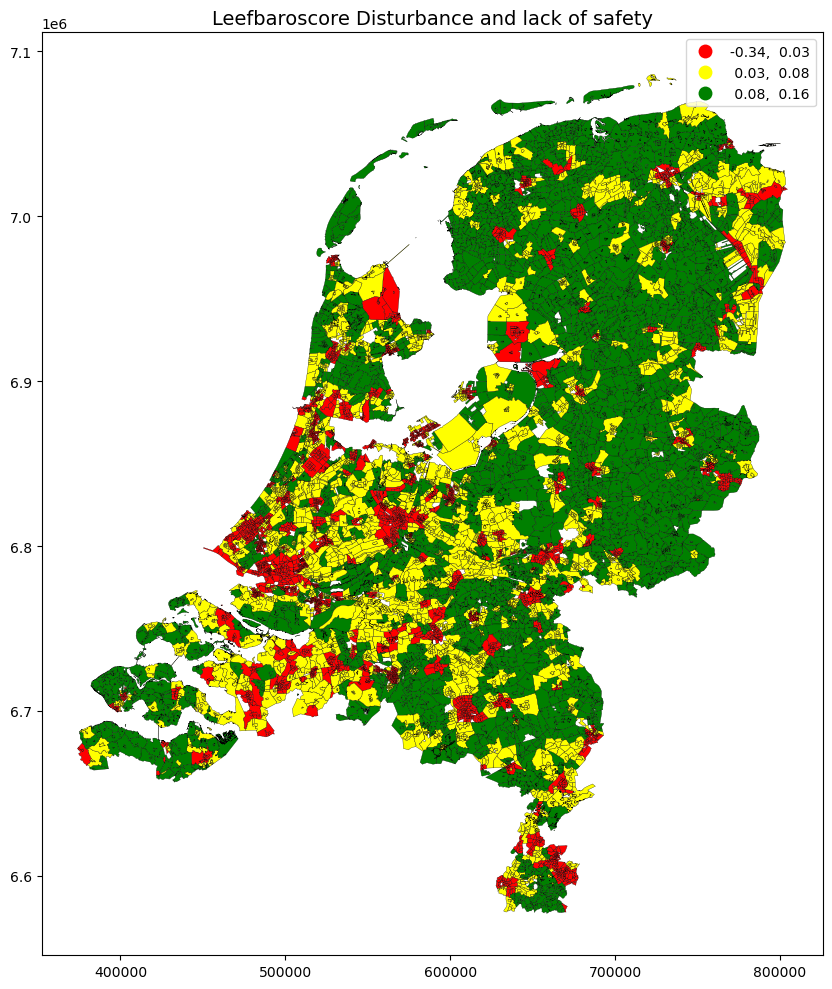

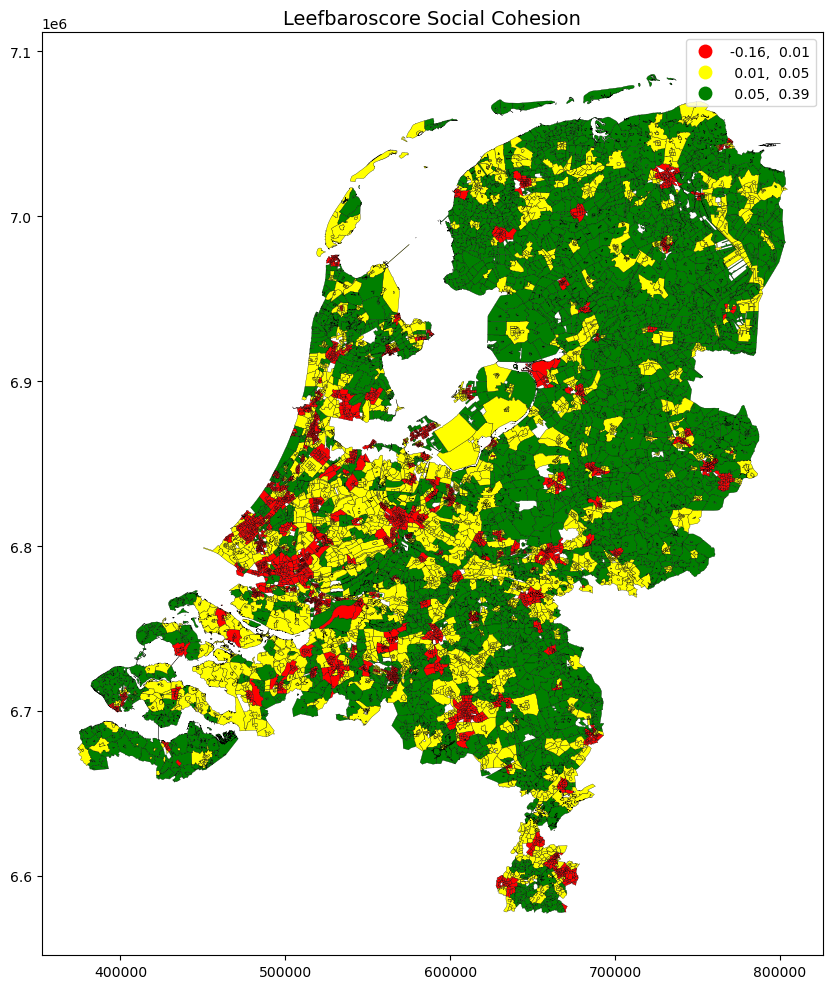

In [35]:
for i in ['Number of business establishments','Leefbaroscore Disturbance and lack of safety','Leefbaroscore Social Cohesion']: 
    column_to_plot = i

    #Define the colors for the quantiles
    colors = ['red', 'yellow', 'green']  # High = green, Mid = yellow, Low = red
    cmap = mcolors.ListedColormap(colors)

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    Df_Final_filtered.plot(
        column=column_to_plot,
        legend=True,
        scheme="quantiles",  
        cmap = mcolors.ListedColormap(colors),  #Custom color map
        k=3,  #Number of quantiles
        ax=ax,
        edgecolor="black",
        linewidth=0.2
    )
    
    #Add title
    ax.set_title(i, fontsize=14)
    plt.tight_layout()
    plt.show()


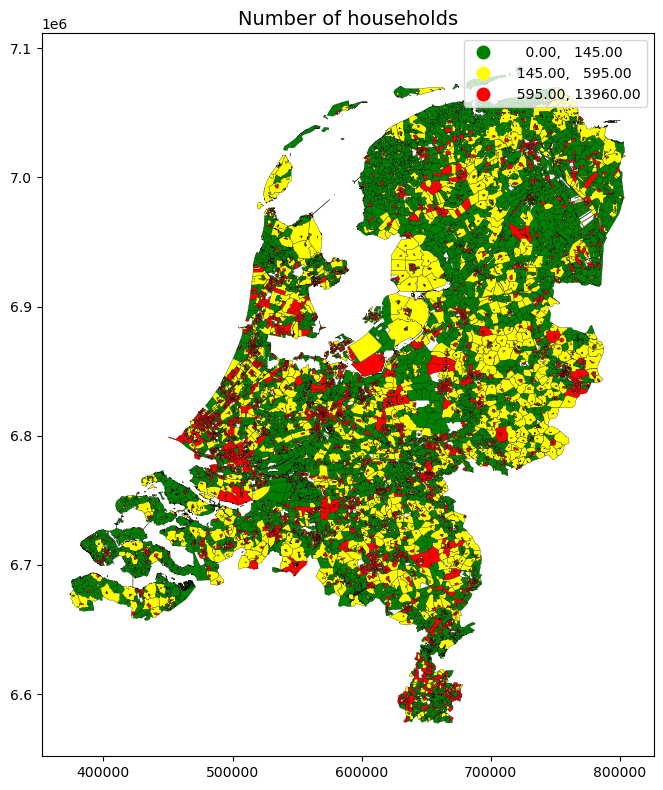

In [36]:
#Define variable to plot
column_to_plot = 'Number of households'

#Colors for quantiles
colors = ['green', 'yellow', 'red']  # Low = green, Mid = yellow, High = red
cmap = mcolors.ListedColormap(colors)

#Creating the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
Df_Final_filtered.plot(
    column=column_to_plot,
    legend=True,
    scheme="quantiles",  # Quantiles scheme
    cmap=mcolors.ListedColormap(colors),  # Custom color map
    k=3,  # Number of quantiles
    ax=ax,
    edgecolor="black",
    linewidth=0.2
)

#Add title
ax.set_title('Number of households', fontsize=14)
plt.tight_layout()
plt.show()


#### Interactive Maps (intensive 100Mb file-sizes)

After showing all the variables on the map seperately. We no use the explore function to give every factor we included into a list when you click on a specific area.

In [37]:
Df_Final_filtered = Df_Final_filtered.loc[:, Df_Final_filtered.columns.isin([
                                    "District Code (CBS)",
                                    'Number of households',
                                    'Number of business establishments',
                                   'Accessibility for Large Supermarket (km)',
                                   'Accessibility for Primary Education (km)',
                                   'Accessibility to Hospitals (Excl. Outpatient Clinic) (km)',
                                   'Accessibility to main road (km)',
                                   'Accessibility for Secondary Education (km)',
                                   'Train Station Accessibility (km)',
                                   'Leefbaroscore Disturbance and lack of safety',
                                   "Leefbaroscore Social Cohesion",
                                    'RefugeeShelter',
                                    'geometry'])]
Df_Final_filtered.head(10)
Df_Final_filtered.to_crs(epsg=3857)

District Code (CBS)  Number of households  \
95               WK001400                  3635   
96               WK001400                  5375   
97               WK001400                  3285   
98               WK001400                  1370   
100              WK001400                  4305   
...                   ...                   ...   
14407            WK199106                   180   
14408            WK199106                   140   
14409            WK199106                   185   
14410            WK199106                   100   
14411            WK199106                    55   

       Number of business establishments  \
95                                  1030   
96                                  1730   
97                                   620   
98                                   320   
100                                  965   
...                                  ...   
14407                                 70   
14408                                 75   
14409                                 40   
14410                                 60   
14411                                 35   

       Accessibility to Hospitals (Excl. Outpatient Clinic) (km)  \
95                                                   1.3           
96                                                   1.3           
97                                                   0.6           
98                                                   2.1           
100                                                  1.5           
...                                                  ...           
14407                                                5.8           
14408                                                7.6           
14409                                                5.7           
14410                                                8.3           
14411                                                9.5           

       Accessibility for Large Supermarket (km)  \
95                                          0.4   
96                                          0.3   
97                                          0.5   
98                                          0.2   
100                                         0.4   
...                                         ...   
14407                                       2.7   
14408                                       2.8   
14409                                       1.9   
14410                                       2.4   
14411                                       4.2   

       Accessibility for Primary Education (km)  \
95                                          0.5   
96                                          0.7   
97                                          0.9   
98                                          1.0   
100                                         0.7   
...                                         ...   
14407                                       0.5   
14408                                       2.1   
14409                                       1.9   
14410                                       2.3   
14411                                       2.9   

       Accessibility for Secondary Education (km)  \
95                                            0.9   
96                                            1.1   
97                                            0.5   
98                                            1.7   
100                                           1.2   
...                                           ...   
14407                                         4.3   
14408                                         5.7   
14409                                         5.1   
14410                                         6.3   
14411                                         4.3   

       Accessibility to main road (km)  Train Station Accessibility (km)  \
95                                 1.8                               1.3   
96                              

Note that with the code below, the colors of the interactive map are associated with the column that is chosen. For now the column 'Number of business establisments' is chosen but any column can be chosen. When this code is run, the 10 different factors are included in the interactive map, neighborhood specific.

In [39]:

Df_Final_filtered.explore(column="Number of business establishments",cmap = "RdYlGn_r" ,scheme="quantiles", k=3)
#Df_Final_filtered.explore(column="Number of households',cmap= "RdYlGn_r",scheme="quantiles")
#Df_Final_filtered.explore(column="Accessibility for Large Supermarket (km)",cmap= "RdYlGn_r",scheme="quantiles")
#Df_Final_filtered.explore(column="Accessibility for Primary Education (km)",cmap= "RdYlGn_r",scheme="quantiles")
#Df_Final_filtered.explore(column="Accessibility to Hospitals (Excl. Outpatient Clinic) (km)",cmap= "RdYlGn_r",scheme="quantiles")
#Df_Final_filtered.explore(column="Accessibility to main road (km)",cmap= "RdYlGn_r",scheme="quantiles")
#Df_Final_filtered.explore(column="Accessibility for Secondary Education (km)",cmap= "RdYlGn_r",scheme="quantiles")
#Df_Final_filtered.explore(column="Train Station Accessibility (km)",cmap= "RdYlGn_r",scheme="quantiles")
#Df_Final_filtered.explore(column="Leefbaroscore Disturbance and lack of safety'",cmap= "RdYlGn_r",scheme="quantiles")
#Df_Final_filtered.explore(column="Leefbaroscore Social Cohesion",cmap= "RdYlGn_r",scheme="quantiles")


KeyboardInterrupt

